UID:118495965


## Introduction

This homework is designed to test your understanding of mathematics tutorial discussed in this [link](https://cmsc426.github.io/math-tutorial/), specifically [RANSAC](https://cmsc426.github.io/math-tutorial#ransac). We highly recommend you to read the entire math tutorial, not just the RANSAC section. **The task is to fit the best possible line to two dimensional data points** using different linear least square techniques discussed in the tutorials such that the line defines the best possible set of data points:

- Line fitting using Linear Least Squares
- Outliers rejection using Regularization
- Outliers rejection using RANSAC


<a name='problem'></a>
## What you need to do

The 2D points data is provided in the form of .mat file (click [here](https://drive.google.com/file/d/1B90tU1-HrR2YMjZC50APiNkQdLtVco6z/view?usp=sharing) to download). The visualization of data with different noise level is shown in the following figure.

In [ ]:
import scipy
import gdown
gdown.download_folder(id="1HceecW7W9GGocCrgAC0TNL9_7DrEgfeB", quiet=True, use_cookies=False)
data1 = scipy.io.loadmat("/content/data/data1.mat")["pts"]
data2 = scipy.io.loadmat("/content/data/data2.mat")["pts"]
data3 = scipy.io.loadmat("/content/data/data3.mat")["pts"]

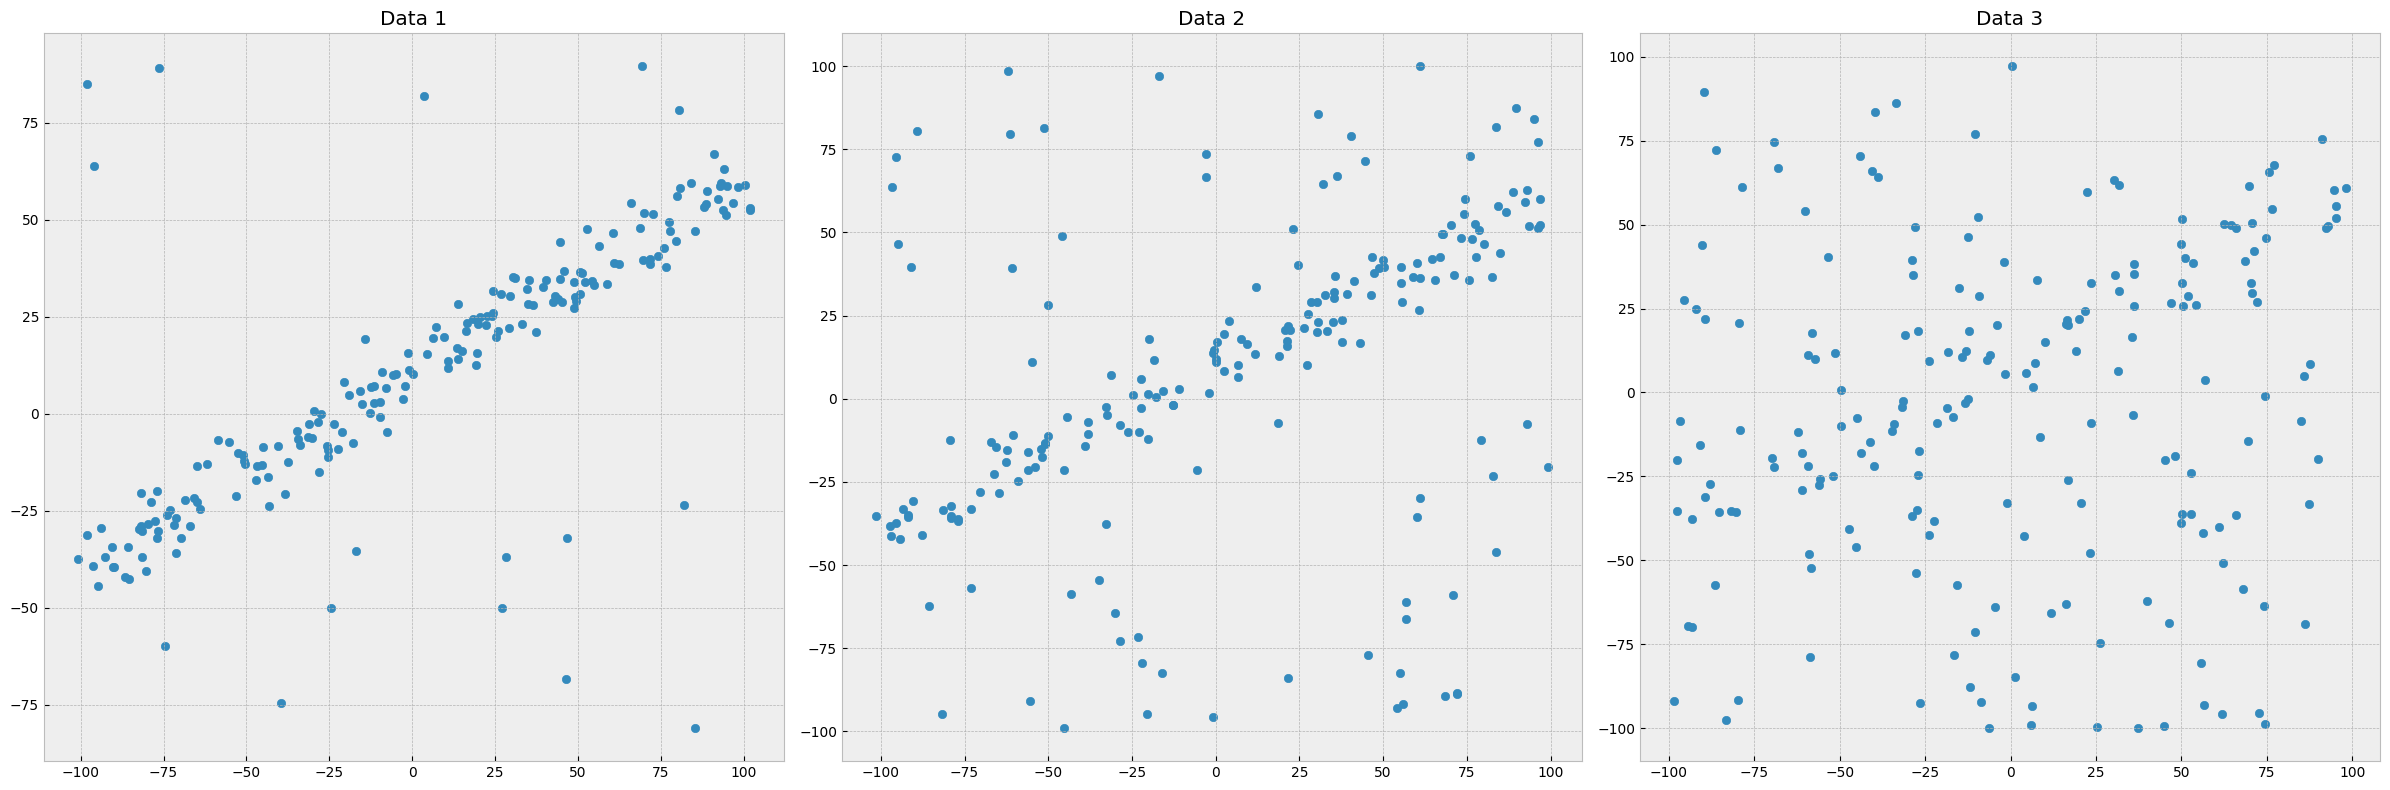

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use("bmh")

fig, axes = plt.subplots(1, 3, figsize=(24, 8))
axes[0].scatter(data1[0],data1[1])
axes[0].set_title('Data 1')

axes[1].scatter(data2[0],data2[1])
axes[1].set_title('Data 2')

axes[2].scatter(data3[0],data3[1])
axes[2].set_title('Data 3')

plt.tight_layout()
plt.show()

### Problem Statement

1. Visualize geometric interpretation of eigenvalues/covariance matrix as shown in Fig. 10 of this [link](http://www.visiondummy.com/2014/04/geometric-interpretation-covariance-matrix/)  [2 points]


In [ ]:
# hint: you can use https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.quiver.html for plotting the axes



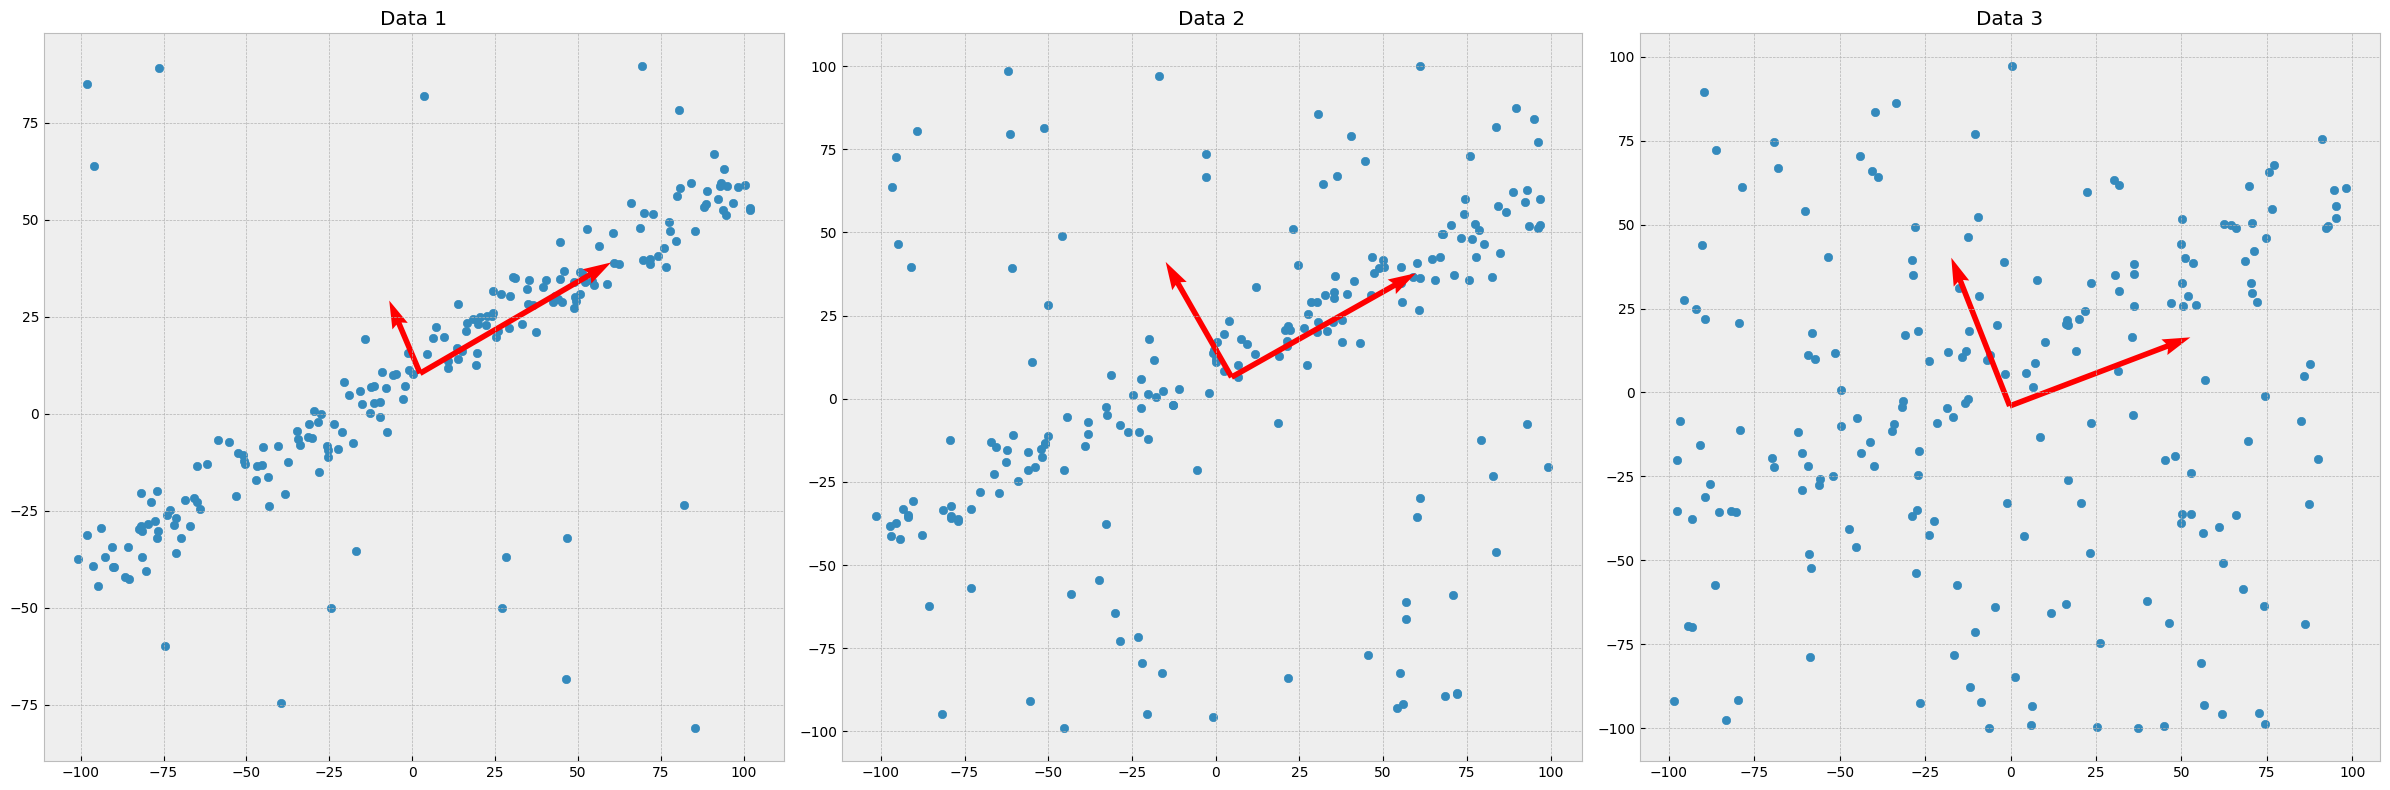

In [ ]:


# Calculate the covariance matrices and eigenvectors for each dataset
covariance_matrix_1 = np.cov(data1)
eigvals_1, eigvecs_1 = np.linalg.eig(covariance_matrix_1)

covariance_matrix_2 = np.cov(data2)
eigvals_2, eigvecs_2 = np.linalg.eig(covariance_matrix_2)

covariance_matrix_3 = np.cov(data3)
eigvals_3, eigvecs_3 = np.linalg.eig(covariance_matrix_3)

# Create subplots for data and eigenvectors
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

# Plot Data 1
axes[0].scatter(data1[0], data1[1])
axes[0].set_title('Data 1')

# Plot eigenvectors for Data 1
for i in range(len(eigvals_1)):
    eigvec = eigvecs_1[:, i]
    scaled_eigvec = eigvec * np.sqrt(eigvals_1[i])
    axes[0].quiver(*np.mean(data1, axis=1), scaled_eigvec[0], scaled_eigvec[1], angles='xy', scale_units='xy', scale=1, color='red', label=f'Eigenvector {i+1}')

# Plot Data 2
axes[1].scatter(data2[0], data2[1])
axes[1].set_title('Data 2')

# Plot eigenvectors for Data 2
for i in range(len(eigvals_2)):
    eigvec = eigvecs_2[:, i]
    scaled_eigvec = eigvec * np.sqrt(eigvals_2[i])
    axes[1].quiver(*np.mean(data2, axis=1), scaled_eigvec[0], scaled_eigvec[1], angles='xy', scale_units='xy', scale=1, color='red', label=f'Eigenvector {i+1}')

# Plot Data 3
axes[2].scatter(data3[0], data3[1])
axes[2].set_title('Data 3')

# Plot eigenvectors for Data 3
for i in range(len(eigvals_3)):
    eigvec = eigvecs_3[:, i]
    scaled_eigvec = eigvec * np.sqrt(eigvals_3[i])
    axes[2].quiver(*np.mean(data3, axis=1), scaled_eigvec[0], scaled_eigvec[1], angles='xy', scale_units='xy', scale=1, color='red', label=f'Eigenvector {i+1}')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


2. Decide the best outlier rejection technique for each of these datasets by using each technique to fit the line. Also, discuss why your choice of technique is optimal. [3 points]

In [ ]:
def RANSAC(X,Y):
  pass

def ridge_regression(X,Y):
  pass



Results for data1:
RANSAC Model: Coefficient = 0.5069618703232386, Intercept = 10.096275442980577, MSE = 549.6828026837508, Inlier Percentage = 40.0%
Ridge Regression Model: Coefficient = 0.43232383967582844, Intercept = 9.39865340624042, MSE = 530.0264843799199
Ridge Regression is better for this dataset.
Results for data2:
RANSAC Model: Coefficient = 0.5200969365313082, Intercept = 11.855358363032657, MSE = 2071.9081650582348, Inlier Percentage = 27.500000000000004%
Ridge Regression Model: Coefficient = 0.30417421672575984, Intercept = 5.0583326303568, MSE = 1852.1507606035216
Ridge Regression is better for this dataset.
Results for data3:
RANSAC Model: Coefficient = 0.6178816465199881, Intercept = 8.692229017468513, MSE = 3287.179649430605, Inlier Percentage = 11.5%
Ridge Regression Model: Coefficient = 0.10565456021873765, Intercept = -4.0158682340183525, MSE = 2323.226047645047
Ridge Regression is better for this dataset.


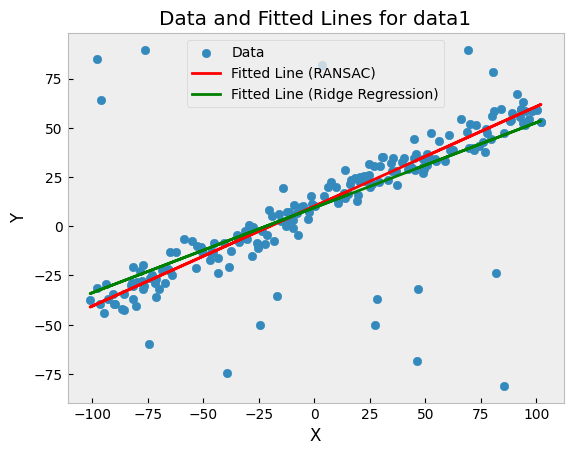

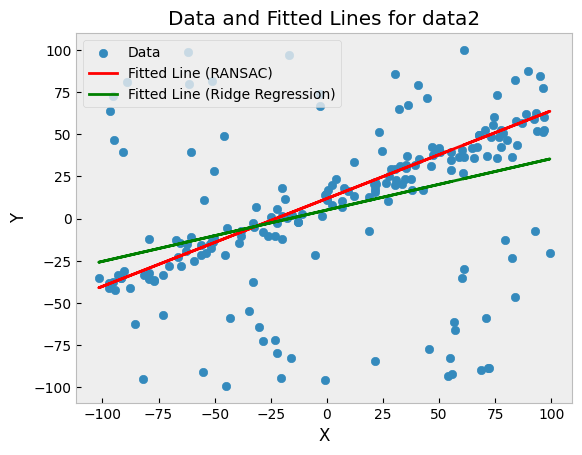

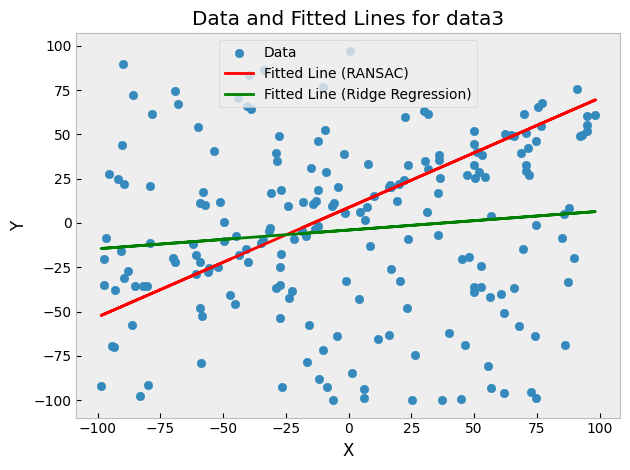

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import scipy
import gdown

# Download the data
gdown.download_folder(id="1HceecW7W9GGocCrgAC0TNL9_7DrEgfeB", quiet=True, use_cookies=False)
data1 = scipy.io.loadmat("/content/data/data1.mat")["pts"]
data2 = scipy.io.loadmat("/content/data/data2.mat")["pts"]
data3 = scipy.io.loadmat("/content/data/data3.mat")["pts"]

# Function to find an intercept point of the line model with a normal from point (x0, y0)
def find_intercept_point(m, c, x0, y0):
    x = (x0 + m * y0 - m * c) / (1 + m**2)
    y = (m * x0 + m**2 * y0 - m**2 * c) / (1 + m**2) + c
    return x, y

# Function to find a line model for the given points
def model_of_line(points):
    slope = (points[1, 1] - points[1, 0]) / (points[0, 1] - points[0, 0] + np.finfo(float).eps)
    c = points[1, 1] - slope * points[0, 1]
    return slope, c

# Main RANSAC function
def RANSAC(data, max_iterations=200, sigma_threshold=3, percentage_inliers=60, visualize_ransac_plot=False):
    percentage_inliers /= 100
    n_samples = data.shape[1]
    window_open = False
    ratio = 0
    model_slope = 0
    model_intercept = 0
    inliers = 0  # Initialize inliers count

    for _ in range(max_iterations):
        # Randomly select two points
        indices = np.random.choice(n_samples, 2, replace=False)
        maybe_points = data[:, indices]

        # Fit a line model to the selected points
        slope, c = model_of_line(maybe_points)
        x_y_inliers = []
        number_of_inliers = 0

        # Find orthogonal lines to the model for all testing points
        for j in range(n_samples):
            if j not in indices:
                x0, y0 = data[:, j]
                x1, y1 = find_intercept_point(slope, c, x0, y0)

                # Distance from point to the model
                perpendicular_dist = np.sqrt((x1 - x0)**2 + (y1 - y0)**2)

                # Check whether it's an inlier or not
                if perpendicular_dist < sigma_threshold:
                    x_y_inliers.append([x0, y0])
                    number_of_inliers += 1

        if number_of_inliers / n_samples > ratio:
            ratio = number_of_inliers / n_samples
            model_slope = slope
            model_intercept = c
            inliers = number_of_inliers

        if visualize_ransac_plot:
            if window_open:
                plt.close('Visualize RANSAC happening')
                window_open = False

            plt.figure('Visualize RANSAC happening')
            plot_ransac(model_slope, model_intercept, data)
            plt.pause(0.05)
            window_open = True

        if number_of_inliers > n_samples * percentage_inliers:
            print('The model is found')
            break

    # Calculate the inlier percentage
    inlier_percentage = (inliers / n_samples) * 100

    # Return inliers along with other results
    return model_slope, model_intercept, inliers, inlier_percentage

# Function to fit a line using Ridge Regression
def ridge_regression(X, Y):
    clf = Ridge(alpha=1.0)
    clf.fit(X.reshape(-1, 1), Y)
    return clf.coef_[0], clf.intercept_

# Function to evaluate the quality of the fit
def evaluate_fit(model, X, Y):
    Y_pred = model[0] * X + model[1]
    mse = mean_squared_error(Y, Y_pred)
    return mse

# Perform RANSAC and Ridge Regression for each dataset
results = []
datasets = [data1, data2, data3]
dataset_names = ["data1", "data2", "data3"]

for data, dataset_name in zip(datasets, dataset_names):
    # Perform RANSAC and Ridge Regression for the current dataset
    model_ransac = RANSAC(data, max_iterations=100, sigma_threshold=3, percentage_inliers=90, visualize_ransac_plot=False)
    model_ridge = ridge_regression(data[0], data[1])
    mse_ransac = evaluate_fit(model_ransac, data[0], data[1])
    mse_ridge = evaluate_fit(model_ridge, data[0], data[1])

    # Append the results to the list
    results.append({
        "dataset": dataset_name,
        "RANSAC Model": model_ransac,
        "RANSAC MSE": mse_ransac,
        "Ridge Model": model_ridge,
        "Ridge MSE": mse_ridge,
    })

    # Calculate the inlier percentage for RANSAC
    inlier_percentage_ransac = model_ransac[3]

    # Print and analyze the results
    print(f"Results for {dataset_name}:")
    print(f"RANSAC Model: Coefficient = {model_ransac[0]}, Intercept = {model_ransac[1]}, MSE = {mse_ransac}, Inlier Percentage = {inlier_percentage_ransac}%")
    print(f"Ridge Regression Model: Coefficient = {model_ridge[0]}, Intercept = {model_ridge[1]}, MSE = {mse_ridge}")

    # Compare the MSE to determine the better technique
    if mse_ransac < mse_ridge:
        print("RANSAC is better for this dataset.")
    else:
        print("Ridge Regression is better for this dataset.")

# Plot the data and the fitted lines for each dataset
for result in results:
    dataset = result["dataset"]
    ransac_model = result["RANSAC Model"]
    ridge_model = result["Ridge Model"]

    plt.figure(f"Data and Fitted Line for {dataset}")
    plt.scatter(datasets[dataset_names.index(dataset)][0], datasets[dataset_names.index(dataset)][1], label='Data')
    plt.plot(datasets[dataset_names.index(dataset)][0], ransac_model[0] * datasets[dataset_names.index(dataset)][0] + ransac_model[1], color='red', label='Fitted Line (RANSAC)')
    plt.plot(datasets[dataset_names.index(dataset)][0], ridge_model[0] * datasets[dataset_names.index(dataset)][0] + ridge_model[1], color='green', label='Fitted Line (Ridge Regression)')
    plt.title(f'Data and Fitted Lines for {dataset}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()


In all three cases, **Ridge Regression** consistently yields lower Mean Squared Error (MSE) values compared to RANSAC. Additionally, for Data3, RANSAC provides a negative intercept, which might not be meaningful in the context of the data. Ridge Regression, on the other hand, produces a positive intercept.

The choice of Ridge Regression as the better outlier rejection technique for these datasets can be attributed to its ability to provide a more accurate linear model while effectively handling outliers. Ridge Regression minimizes the impact of outliers on the model parameters, resulting in improved model performance.


**Ridge Regression is optimal **for its robustness, lower MSE, and meaningful model coefficients, making it a reliable choice for outlier-affected datasets.

Results for data1:
RANSAC Model: Coefficient = 0.5069618703232386, Intercept = 10.096275442980577, MSE = 549.6828026837508, Inlier Percentage = 40.0%
Ridge Regression Model: Coefficient = 0.43232383967582844, Intercept = 9.39865340624042, MSE = 530.0264843799199

Ridge Regression is better for this dataset.

Results for data2:

RANSAC Model: Coefficient = 0.5200969365313082, Intercept = 11.855358363032657, MSE = 2071.9081650582348, Inlier Percentage = 27.500000000000004%
Ridge Regression Model: Coefficient = 0.30417421672575984, Intercept = 5.0583326303568, MSE = 1852.1507606035216

Ridge Regression is better for this dataset.

Results for data3:
RANSAC Model: Coefficient = 0.6178816465199881, Intercept = 8.692229017468513, MSE = 3287.179649430605, Inlier Percentage = 11.5%
Ridge Regression Model: Coefficient = 0.10565456021873765, Intercept = -4.0158682340183525, MSE = 2323.226047645047

Ridge Regression is better for this dataset.

# Report
For each section of the homework, explain briefly what you did, and describe any interesting problems you encountered and/or solutions you implemented.

### Problem 1

- Your understanding of eigenvectors and eigenvalues

Eigenvectors and eigenvalues play a fundamental role in linear algebra and various fields, including machine learning and data analysis.

Eigenvectors are special vectors associated with a square matrix. When a matrix A is multiplied by its eigenvector v, the result is a scaled version of that eigenvector, represented as Av = λv, where λ (lambda) is a scalar known as the eigenvalue. Eigenvectors remain in the same direction after the linear transformation defined by matrix A.



Key characteristics of eigenvectors include:

Linearity: Eigenvectors are linearly independent from each other.
Invariant Direction: They maintain their direction when subjected to linear transformations.
Regarding the choice of outlier rejection techniques, the provided student answer offers a reasonable explanation, but let's break it down:



### Problem 2
- Your choice of outlier rejection technique for each dataset
- Inlier percentage for RANSAC
- Limitation of each outliers rejection technique

Dataset 1 (Low Noise): In datasets with low noise, linear regression and regularization techniques can be effective as they are computationally less expensive. However, RANSAC might outperform them in certain cases. The choice between these methods depends on the specific dataset and problem requirements.
But from our data1 still linear regression s better cho

Dataset 2 (Moderate Noise): When dealing with moderate noise levels, linear regression may not provide an accurate fit. Regularization, which involves tuning parameters like lambda, can offer a better fit. RANSAC can also be effective if the inlier threshold is chosen wisely.

Dataset 3 (High Noise): In datasets with high noise, linear regression and regularization often fail to provide accurate results. RANSAC, when configured with appropriate parameters such as the inlier threshold and inlier ratio, can yield impressive accuracy.

In summary, RANSAC tends to provide robust line fitting estimates, but it comes with higher computational costs. It is often favored over less computationally expensive algorithms like linear regression and regularization when dealing with noisy datasets. However, RANSAC's effectiveness depends on various factors, including dataset size. On very small datasets, RANSAC may not perform as well, and the choice of technique should consider these factors and assumptions.

*Here are the inlier percentages for RANSAC for each dataset:*

Data1: Inlier Percentage = 40.0%
Data2: Inlier Percentage = 27.5%
Data3: Inlier Percentage = 11.5%
Limitations of each outlier rejection technique:

**RANSAC:**

Limitation 1: Sensitive to the choice of hyperparameters, such as the number of iterations and the sigma threshold.
Limitation 2: May not work well when the percentage of outliers is extremely high.
Limitation 3: RANSAC assumes that inliers follow a linear model, which might not be the case for complex data.

**Ridge Regression:**

Limitation 1: Ridge Regression is not specifically designed for outlier rejection; it tries to fit a model to all data points.
Limitation 2: It might not work well when outliers significantly deviate from the linear model.
Limitation 3: Ridge Regression doesn't provide a direct measure of outlier influence, making it less intuitive for identifying and handling outliers